In [1]:
from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
import pandas as pd
import numpy as np
from ipyparallel import Client
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

In [2]:
c = Client()
v = c.load_balanced_view()
np.random.seed(0) #seed the generator for deterministic results

/usr/local/lib/python3.5/dist-packages/ipyparallel/client/client.py:458: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@osboxes')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


# Scatter plots and histograms
## Start local cluster with "ipcluster start --n=10"
## Effect of probability of conversion on number of VirtuousAgents at step 300

In [3]:
def run_model_300(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    seed, prob_conversion = seed_x_tuple
    model = VirtuousEmotivistModel(seed, 25, 25, 0.8, 0.2, 2, 3, 0.01, 8, 1, prob_conversion, 0.98, 0.0, 0.02\
                       , 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 1.0, 1.0, 1.0, 0.7, 0, 0, 0, 2, 0.75, 'A', 'A', 'A')
    while model.running and model.schedule.steps < 300: #run for 300 steps
        model.step()
    
    model_out = model.datacollector.get_model_vars_dataframe()
    return model_out['virtuous_count'][300]

In [4]:
seed_val = 0
list_x = []
list_y = []
for x in np.arange(0.0, 0.0205, 0.0005):
    tuples = []
    for seed in range(seed_val, seed_val + 10):
        tuples.append((seed, x))
    ret = v.map(run_model_300, tuples)
    for val in ret:
        list_x.append(x)
        list_y.append(val)
    print(str(x))
    seed_val += 10

0.0
0.0005
0.001
0.0015
0.002
0.0025
0.003
0.0035
0.004
0.0045000000000000005
0.005
0.0055
0.006
0.006500000000000001
0.007
0.0075
0.008
0.0085
0.009000000000000001
0.0095
0.01
0.0105
0.011
0.0115
0.012
0.0125
0.013000000000000001
0.0135
0.014
0.0145
0.015
0.0155
0.016
0.0165
0.017
0.0175
0.018000000000000002
0.0185
0.019
0.0195
0.02


In [6]:
pd.set_option('display.max_rows', 350)

In [9]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [14, 10]

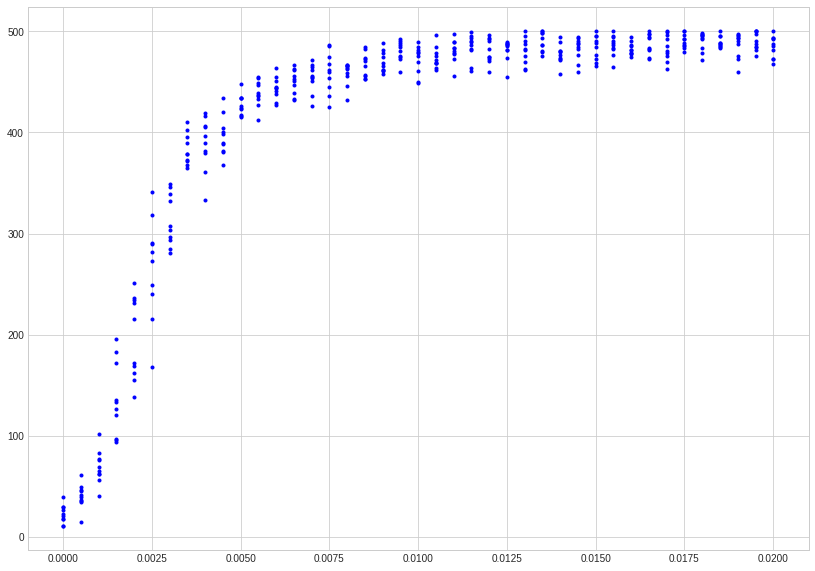

In [10]:
plt.plot(list_x, list_y, 'o', color='blue', markersize=3);
plt.show()

---
### Effect of count_extra_det (number of extra-determined agents with belief A) on count of all A-believing agents
#### count_extra_det does not increase the overall number of A-believing agents in the beginning

In [11]:
def run_model_300_det(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    seed, det = seed_x_tuple
    model = VirtuousEmotivistModel(seed, 25, 25, 0.8, 0.0, 3, 3, 0.01, 8, 1, 0.0, 0.98, 0.0, 0.02\
                       , 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 1.0, 1.0, 1.0, 0.7, 0, det, 0, 2, 0.75, 'A', 'A', 'A')
    while model.running and model.schedule.steps < 300: #run for 300 steps
        model.step()
    
    df = model.datacollector.agent_vars["strongest_belief"][-1]
    count = 0
    for tup in df:
        num, belief = tup
        if belief == 'A':
            count += 1
    return count

In [12]:
seed_val = 0
list_x_det = []
list_y_det = []
for x in np.arange(0, 70):
    tuples = []
    for seed in range(seed_val, seed_val + 10):
        tuples.append((seed, x))
    ret = v.map(run_model_300_det, tuples)
    for val in ret:
        list_x_det.append(x)
        list_y_det.append(val)
    print(str(x))
    seed_val += 10

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


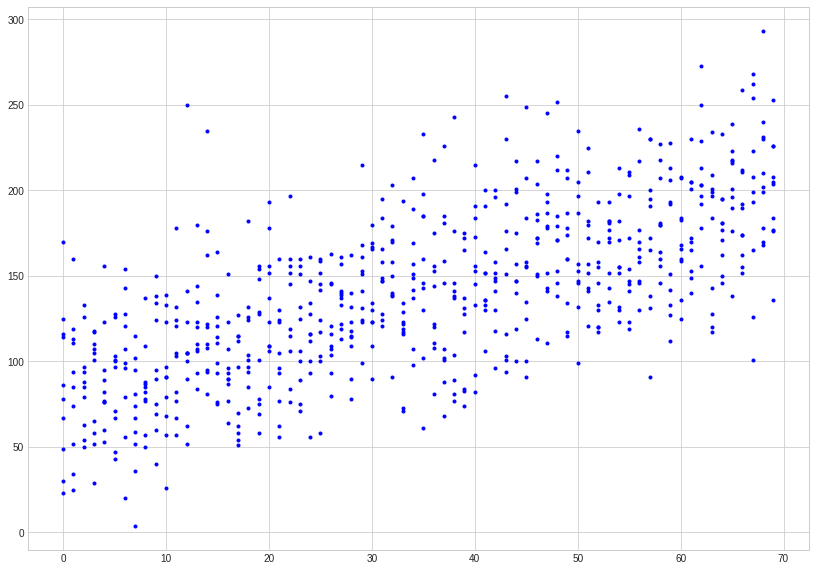

In [13]:
plt.plot(list_x_det, list_y_det, 'o', color='blue', markersize=3);

---
### Effect of count_extra_pow (number of extra-powerful agents with belief A) on count of all A-believing agents
#### count_extra_pow does not increase the overall number of A-believing agents in the beginning

In [ ]:
def run_model_300_emo_power(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    seed, power = seed_x_tuple
    model = VirtuousEmotivistModel(seed, 25, 25, 0.8, 0.0, 4, 4, 0.01, 8, 0, 0.0, 0.98, 0.0, 0.02\
                       , 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 1.0, 1.0, 1.0, 0.7, power, 0, 0, 2, 0.75, 'A', 'A', 'A')
    #only emotivists
    while model.running and model.schedule.steps < 300: #run for 300 steps
        model.step()
    
    df = model.datacollector.agent_vars["strongest_belief"][-1]
    count = 0
    for tup in df:
        num, belief = tup
        if belief == 'A':
            count += 1
    return count

In [ ]:
seed_val = 0
list_x_pow = []
list_y_pow = []
for x in np.arange(0, 70):
    tuples = []
    for seed in range(seed_val, seed_val + 10):
        tuples.append((seed, x))
    ret = v.map(run_model_300_emo_power, tuples)
    for val in ret:
        list_x_pow.append(x)
        list_y_pow.append(val)
    print(str(x))
    seed_val += 10

In [ ]:
plt.plot(list_x_pow, list_y_pow, 'o', color='blue', markersize=3);


---
### Effect of homophily on count of B-believing (majority) agents. No VirtuousAgents at all

In [ ]:
def run_model_300_homophily(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    seed, homophily = seed_x_tuple
    model = VirtuousEmotivistModel(seed, 25, 25, 0.8, 0.0, homophily, 2, 0.01, 8, 0, 0.0, 0.98, 0.0, 0.025\
                       , 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 1.0, 1.0, 1.0, 0.7, 0, 0, 0, 2, 0.75, 'A', 'A', 'A')
    #has no virtuousagents
    #effect of homophily on count of B (majority)
    while model.running and model.schedule.steps < 300: #run for 300 steps
        model.step()
    
    df = model.datacollector.agent_vars["strongest_belief"][-1]
    count = 0
    for tup in df:
        num, belief = tup
        if belief == 'B':
            count += 1
    return count

In [ ]:
seed_val = 0
list_x_homophily = []
list_y_homophily = []
for x in np.arange(0, 9):
    tuples = []
    for seed in range(seed_val, seed_val + 50):
        tuples.append((seed, x))
    ret = v.map(run_model_300_homophily, tuples)
    for val in ret:
        list_x_homophily.append(x)
        list_y_homophily.append(val)
    print(str(x))
    seed_val += 100 #offset should not affect results

In [ ]:
plt.plot(list_x_homophily, list_y_homophily, 'o', color='blue', markersize=3);

## Effect of num_of_detpow with belief A on count of A at step 100, with random move prob of 0.0125

In [15]:
def run_model_100_randommove_detpow(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    seed, num_of_detpow = seed_x_tuple
    model = VirtuousEmotivistModel(seed, 25, 25, 0.8, 0.0, 4, 2, 0.01, 8, 0, 0.0, 0.98, 0.0125, 0.025\
                       , 0.3, 0.4, 0.3, 0.32, 0.36, 0.32, 1.0, 1.0, 1.0, 0.7, 0, 0, num_of_detpow, 2, 0.75, 'A', 'A', 'A')
    #only emotivist agents with homophily=4
    #effect of num_of_detpow with belief A on count of A at step 100, with random move prob of 0.0125
    #closer starting distribution of 0.32,0.36,0.32
    # 100 steps shows results in the short term
    while model.running and model.schedule.steps < 100: #run for 100 steps
        model.step()
    
    df = model.datacollector.agent_vars["strongest_belief"][-1]
    count = 0
    for tup in df:
        num, belief = tup
        if belief == 'A':
            count += 1
    return count

In [16]:
seed_val = 0
list_x_detpow1 = []
list_y_detpow1 = []
for x in np.arange(0, 50):
    tuples = []
    for seed in range(seed_val, seed_val + 10):
        tuples.append((seed, x))
    ret = v.map(run_model_100_randommove_detpow, tuples)
    for val in ret:
        list_x_detpow1.append(x)
        list_y_detpow1.append(val)
    print(str(x))
    seed_val += 10 #accidental offset should not affect results

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


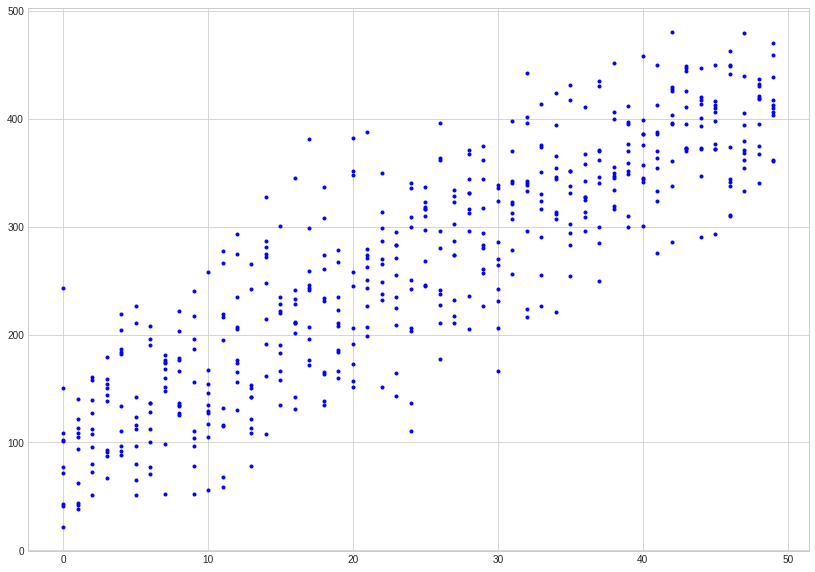

In [17]:
plt.plot(list_x_detpow1, list_y_detpow1, 'o', color='blue', markersize=3);

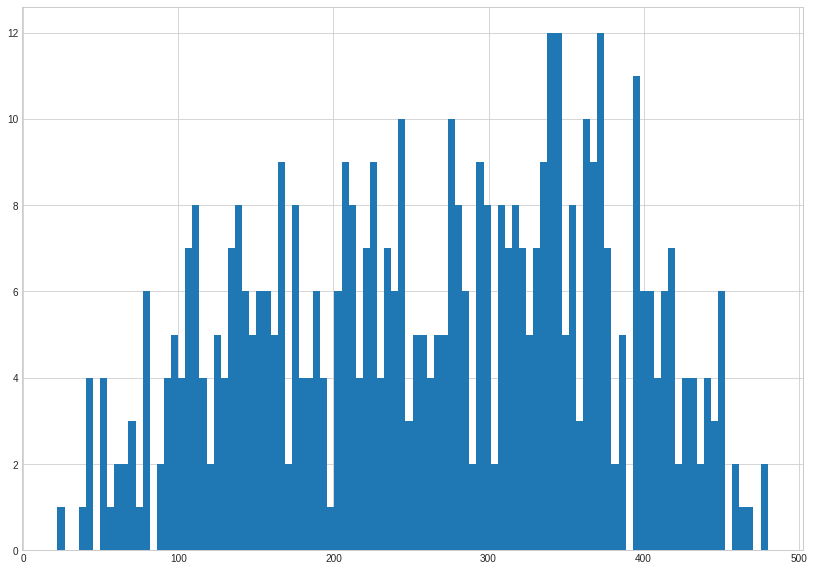

In [18]:
plt.hist(list_y_detpow1, bins=100);

### Effect of num_of_detpow with belief A on count of A at step 200, with random move prob of 0.0125

In [19]:
def run_model_200_randommove_detpow(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    seed, num_of_detpow = seed_x_tuple
    model = VirtuousEmotivistModel(seed, 25, 25, 0.8, 0.0, 4, 2, 0.01, 8, 0, 0.0, 0.98, 0.0125, 0.025\
                       , 0.3, 0.4, 0.3, 0.32, 0.36, 0.32, 1.0, 1.0, 1.0, 0.7, 0, 0, num_of_detpow, 2, 0.75, 'A', 'A', 'A')
    #only emotivist agents with homophily=4
    #effect of num_of_detpow with belief A on count of A at step 200, with random move prob of 0.0125
    #closer starting distribution of 0.32,0.36,0.32
    #for longer step sizes (in the long run), the model will tend to attract towards A (because of extra detpow) or B (because of starting majority)
    while model.running and model.schedule.steps < 200: #run for 200 steps
        model.step()
    
    df = model.datacollector.agent_vars["strongest_belief"][-1]
    count = 0
    for tup in df:
        num, belief = tup
        if belief == 'A':
            count += 1
    return count

In [20]:
seed_val = 0
list_x_detpow2 = []
list_y_detpow2 = []
for x in np.arange(0, 50):
    tuples = []
    for seed in range(seed_val, seed_val + 10):
        tuples.append((seed, x))
    ret = v.map(run_model_200_randommove_detpow, tuples)
    for val in ret:
        list_x_detpow2.append(x)
        list_y_detpow2.append(val)
    print(str(x))
    seed_val += 10 #accidental offset should not affect results

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


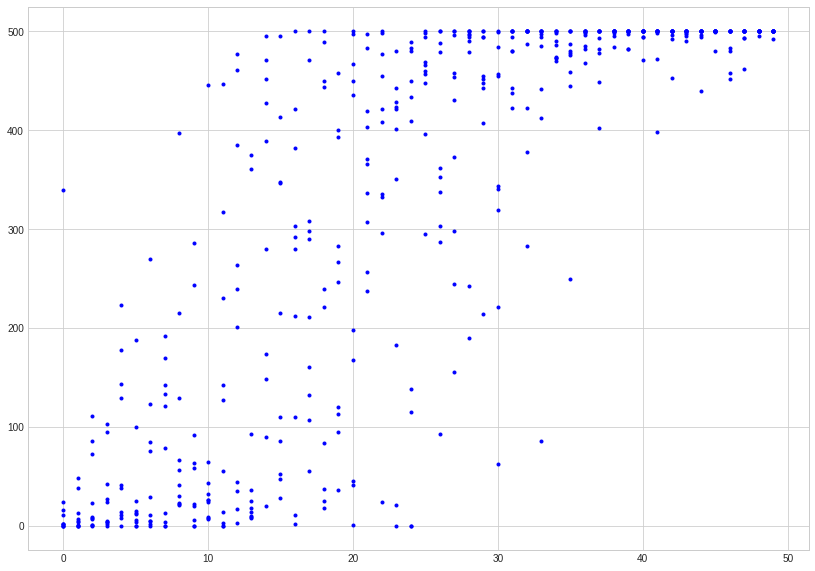

In [21]:
plt.plot(list_x_detpow2, list_y_detpow2, 'o', color='blue', markersize=3);

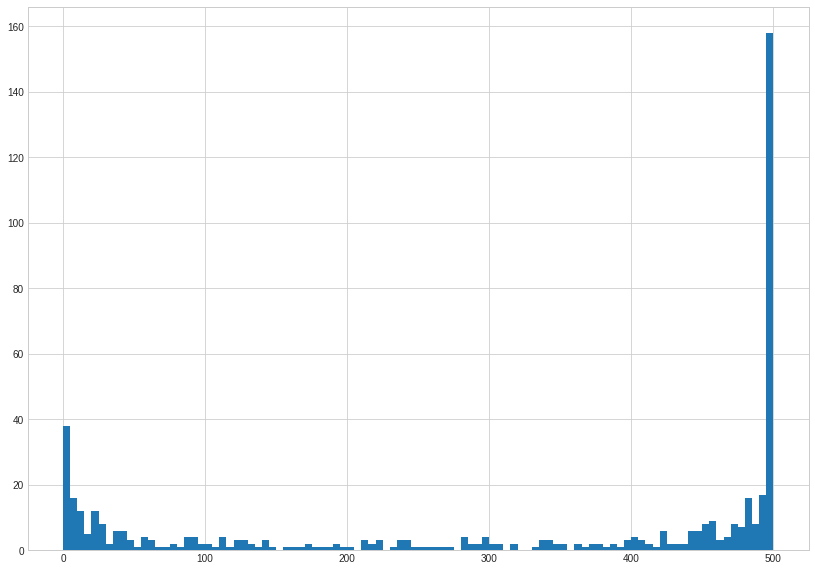

In [22]:
plt.hist(list_y_detpow2, bins=100);

In [23]:
%store list_x
%store list_y
%store list_x_det
%store list_y_det
%store list_x_detpow1
%store list_y_detpow1
%store list_x_detpow2
%store list_y_detpow2

Stored 'list_x' (list)
Stored 'list_y' (list)
Stored 'list_x_det' (list)
Stored 'list_y_det' (list)
Stored 'list_x_detpow1' (list)
Stored 'list_y_detpow1' (list)
Stored 'list_x_detpow2' (list)
Stored 'list_y_detpow2' (list)


## Sensitivity analysis:
#### Effect of multiple parameters on proportion of VirtuousAgents at each step 0...300

In [25]:
problem = {
    'num_vars': 7,
    'names': ['density', 'virtuous_homophily', 'num_to_convert', 'convert_prob', 'random_move_prob',
             'traditionless_life_decrease', 'random_seed'],
    'bounds': [[0.2,0.9],[1,8],[0.51,8.49],[0.0001, 0.03],[0.0,0.1],[0.0,0.08],[0,500000]]
}

In [22]:
param_values = saltelli.sample(problem,130)
param_values.shape

(2080, 7)

In [23]:
def run_model_sensitivity(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    import numpy as np
    seed, X, num_steps, step_size = seed_x_tuple
    model = VirtuousEmotivistModel(int(X[6]), 25, 25, X[0], 0.2, 4, int(round(X[1])), 0.01, 8, int(round(X[2])), X[3], 0.98, X[4], X[5]\
                       , 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 1.0, 1.0, 1.0, 0.7, 0, 0, 0, 2, 0.75, 'A', 'A', 'A')
    #effect of multiple parameters on proportion of virtuousagents
    
    virtuous_pc = []
    i=0
    while model.running and model.schedule.steps < num_steps: #run for n steps
        model.step()
        if (model.schedule.steps in range(0, num_steps+step_size, step_size)):
            model_out = model.datacollector.get_model_vars_dataframe()
            if (model.schedule.get_agent_count() > 0):
                virtuous_pc.append(model_out['virtuous_count'][model.schedule.steps] / float(model.schedule.get_agent_count()))
            else:
                virtuous_pc.append(0.0)
            i += 1
    
    return virtuous_pc

In [24]:
def calc_si_steps(num_steps, step_size):
    #param_values = saltelli.sample(problem,30)
    Y = np.zeros([param_values.shape[0], num_steps//step_size])
    
    for i in range(0,param_values.shape[0],10):
        tuples = []
        for tmp, X in enumerate(param_values[i:i+10]):
            tuples.append((tmp+i, X, num_steps, step_size))
            #print(tmp+i)

        ret = v.map_sync(run_model_sensitivity, tuples)
        print("calc_si_steps: " + str(i))
        residx = 0
        for result in ret:
            Y[i+residx] = result
            residx += 1
    
    return Y
        

In [25]:
Y = calc_si_steps(300, 1)

calc_si_steps: 0
calc_si_steps: 10
calc_si_steps: 20
calc_si_steps: 30
calc_si_steps: 40
calc_si_steps: 50
calc_si_steps: 60
calc_si_steps: 70
calc_si_steps: 80
calc_si_steps: 90
calc_si_steps: 100
calc_si_steps: 110
calc_si_steps: 120
calc_si_steps: 130
calc_si_steps: 140
calc_si_steps: 150
calc_si_steps: 160
calc_si_steps: 170
calc_si_steps: 180
calc_si_steps: 190
calc_si_steps: 200
calc_si_steps: 210
calc_si_steps: 220
calc_si_steps: 230
calc_si_steps: 240
calc_si_steps: 250
calc_si_steps: 260
calc_si_steps: 270
calc_si_steps: 280
calc_si_steps: 290
calc_si_steps: 300
calc_si_steps: 310
calc_si_steps: 320
calc_si_steps: 330
calc_si_steps: 340
calc_si_steps: 350
calc_si_steps: 360
calc_si_steps: 370
calc_si_steps: 380
calc_si_steps: 390
calc_si_steps: 400
calc_si_steps: 410
calc_si_steps: 420
calc_si_steps: 430
calc_si_steps: 440
calc_si_steps: 450
calc_si_steps: 460
calc_si_steps: 470
calc_si_steps: 480
calc_si_steps: 490
calc_si_steps: 500
calc_si_steps: 510
calc_si_steps: 520
calc

In [26]:
Y.shape

(2080, 300)

In [28]:
Si_list = []
for i in range(0,Y.shape[1]):
    to_proc = np.zeros([Y.shape[0]])
    for j in range(0,Y.shape[0]):
        to_proc[j] = Y[j][i]
    
    Si_list.append((i, sobol.analyze(problem, to_proc)))
    

In [ ]:
def print_si():
    print(str(problem) + "\n")
    for idx, si in Si_list:
        print(str(idx) + ": " + str(si['S1']))

In [ ]:
print_si()

In [ ]:
v.clear()
c.purge_everything()

In [26]:
ans = [[] for _ in range(0,problem['num_vars'])]
print(ans)

for idx, si in Si_list:
    #print(si['S1'])
    for i in range(0,len(si['S1'])):
        #print(val)
        #print(si['S1'][i])
        ans[i].append(si['S1'][i])
        #if (i == 0):
        #    print("app")
        #print(i)
    #print(idx)
    #if (idx == 2):
    #    print(ans)

print(len(ans[0]))
ans = np.array(ans)
print(ans.shape)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [18, 11]
plt.stackplot(range(0,300), np.asarray(ans), labels=["density", "virtuous_homophily", "num_to_convert", "convert_prob", "random_move_prob", "traditionless_life_decrease", "random_seed"])
plt.legend(loc=0,bbox_to_anchor=(1.17,1.0))

[[], [], [], [], [], [], []]


NameError: name 'Si_list' is not defined

---
### Effect of multiple parameters on proportion of A-believing EmotivistAgents at each step 0...300
#### No VirtuousAgents

In [9]:
np.random.seed(1)
problem2 = {
    'num_vars': 9,
    'names': ['random_seed', 'density', 'homophily', 'nudge_amount', 'num_to_argue', 'random_move_prob',\
              'strongest_belief_weight', 'count_extra_pow', 'count_extra_det'],
    'bounds': [[0,500000],[0.2,0.95],[0.55,8.45],[0.001,0.1],[0.55,8.45],[0.0, 0.1],[0.4,0.95],[0,150],[0,150]]
}
param_values2 = saltelli.sample(problem2,100)
param_values2.shape

(2000, 9)

In [10]:
def run_model_sensitivity2(seed_x_tuple):
    from model import VirtuousEmotivistModel, EmotivistAgent, VirtuousAgent
    import numpy as np
    seed, X, num_steps, step_size = seed_x_tuple
    model = VirtuousEmotivistModel(int(X[0]), 25, 25, X[1], 0.0, int(round(X[2])), 4, X[3], int(round(X[4])), 0, 0.0, 0.98, X[5]\
            , 0.0, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 1.0, 1.0, 1.0, X[6], int(round(X[7])), int(round(X[8])), 0, 2, 0.75, 'A', 'A', 'A')
    #effect of multiple parameters on proportion of virtuousagents
    #0.0% emotivist agents
    a_belief_count = []
    i=0
    while model.running and model.schedule.steps < num_steps: #run for n steps
        model.step()
        if (model.schedule.steps in range(0, num_steps+step_size, step_size)):
            df = model.datacollector.agent_vars["strongest_belief"][-1]
            count = 0
            for tup in df:
                num, belief = tup
                if belief == 'A':
                    count += 1
            a_belief_count.append(count)
            i += 1
    
    return a_belief_count

In [11]:
def calc_si_steps2(num_steps, step_size):
    #param_values = saltelli.sample(problem,30)
    Y = np.zeros([param_values2.shape[0], num_steps//step_size])
    
    for i in range(0,param_values2.shape[0],10):
        #c = Client()
        #v = c.load_balanced_view()
        tuples = []
        for tmp, X in enumerate(param_values2[i:i+10]):
            tuples.append((tmp+i, X, num_steps, step_size)) #seed unused
            #print(tmp+i)

        ret = v.map_sync(run_model_sensitivity2, tuples, balanced=True)
        print("calc_si_steps2: " + str(i))
        residx = 0
        for result in ret:
            Y[i+residx] = result
            residx += 1
        #c.purge_everything()
        #c.close()
        #del v
        #del c
    return Y

In [12]:
Y2 = calc_si_steps2(300,1)

calc_si_steps2: 0
calc_si_steps2: 10
calc_si_steps2: 20
calc_si_steps2: 30
calc_si_steps2: 40
calc_si_steps2: 50
calc_si_steps2: 60
calc_si_steps2: 70
calc_si_steps2: 80
calc_si_steps2: 90
calc_si_steps2: 100
calc_si_steps2: 110
calc_si_steps2: 120
calc_si_steps2: 130
calc_si_steps2: 140
calc_si_steps2: 150
calc_si_steps2: 160
calc_si_steps2: 170
calc_si_steps2: 180
calc_si_steps2: 190
calc_si_steps2: 200
calc_si_steps2: 210
calc_si_steps2: 220
calc_si_steps2: 230
calc_si_steps2: 240
calc_si_steps2: 250
calc_si_steps2: 260
calc_si_steps2: 270
calc_si_steps2: 280
calc_si_steps2: 290
calc_si_steps2: 300
calc_si_steps2: 310
calc_si_steps2: 320
calc_si_steps2: 330
calc_si_steps2: 340
calc_si_steps2: 350
calc_si_steps2: 360
calc_si_steps2: 370
calc_si_steps2: 380
calc_si_steps2: 390
calc_si_steps2: 400
calc_si_steps2: 410
calc_si_steps2: 420
calc_si_steps2: 430
calc_si_steps2: 440
calc_si_steps2: 450
calc_si_steps2: 460
calc_si_steps2: 470
calc_si_steps2: 480
calc_si_steps2: 490
calc_si_ste

In [27]:
#stores:
%store Y2
%store Y
%store problem
%store problem2
#%store Y

Stored 'Y2' (ndarray)
Stored 'Y' (ndarray)


In [14]:
Si_list2 = []
for i in range(0,Y2.shape[1]):
    to_proc = np.zeros([Y2.shape[0]])
    for j in range(0,Y2.shape[0]):
        to_proc[j] = Y2[j][i]
    
    Si_list2.append((i, sobol.analyze(problem2, to_proc)))

[[], [], [], [], [], [], [], [], []]
300
(9, 300)


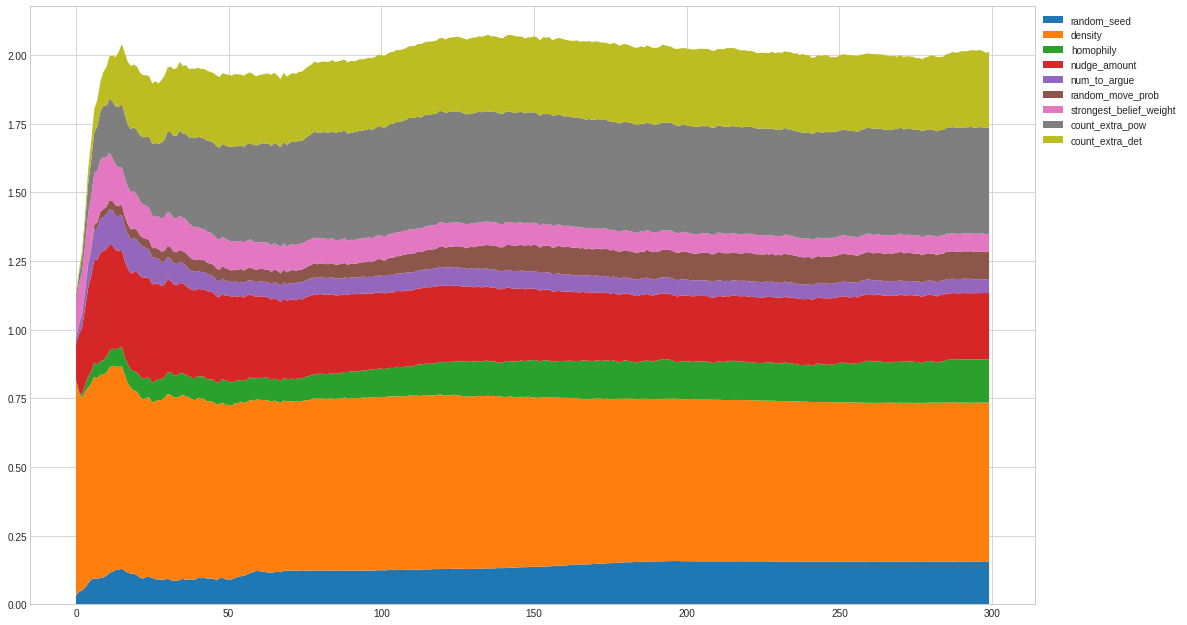

In [59]:
ans = [[] for _ in range(0,problem2['num_vars'])]
print(ans)

for idx, si in Si_list2:
    #print(si['S1'])
    for i in range(0,len(si['ST'])):
        #print(val)
        #print(si['S1'][i])
        ans[i].append(si['ST'][i])
        #if (i == 0):
        #    print("app")
        #print(i)
    #print(idx)
    #if (idx == 2):
    #    print(ans)

print(len(ans[0]))
ans = np.array(ans)
print(ans.shape)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [18, 11]
plt.stackplot(range(0,300), np.asarray(ans), labels=['random_seed', 'density', 'homophily', 'nudge_amount', 'num_to_argue', 'random_move_prob', 'strongest_belief_weight', 'count_extra_pow', 'count_extra_det'])
plt.legend(loc=0,bbox_to_anchor=(1.15,1.0))

In [ ]:
%store -d Y2